Finished with 438 steps. Error = 9.913861614974095e-08


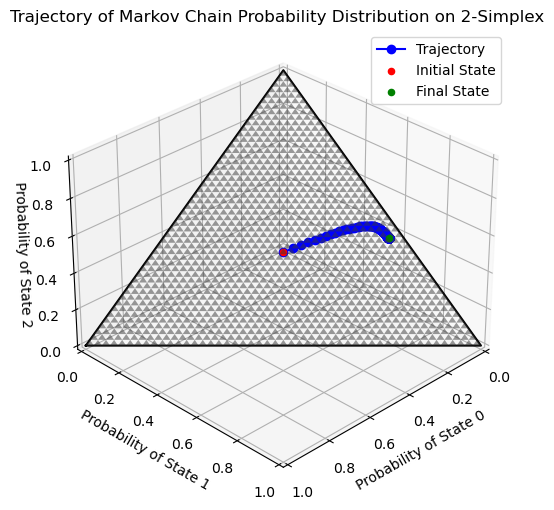

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate vertices of 2-simplex
def generate_simplex_vertices(num_points):
    x = np.linspace(0, 1, num_points)
    y = np.linspace(0, 1, num_points)
    X, Y = np.meshgrid(x, y)
    Z = 1 - X - Y  # Equation of the simplex
    return X, Y, Z

# Transition matrix for the Markov chain
transition_matrix = np.array([[0.9, 0.05, 0.05],
                              [0, 0.99, 0.01],
                              [0.01, 0.01, 0.98]])

# Initial probability vector (uniform distribution)
pi = np.array([1/3, 1/3, 1/3])

# Function to simulate the convergence of a Markov chain
def markov_chain(pi, transition_matrix, tol=1e-7):
    error = 1
    steps = 0
    trajectory = [pi]
    
    # Simulate the Markov chain until convergence
    while error > tol:
        steps += 1
        pi = np.dot(pi, transition_matrix)
        trajectory.append(pi)
        
        # Calculate the error (convergence criterion)
        error = abs(trajectory[-2][0] - trajectory[-1][0]) + abs(trajectory[-2][1] - trajectory[-1][1]) + abs(trajectory[-2][2] - trajectory[-1][2])
    
    print("Finished with " + str(steps) + " steps. Error = " + str(error))
    return trajectory

# Run the Markov chain convergence simulation
pi_trajectory = markov_chain(pi, transition_matrix)

# Convert trajectory to numpy array for easier manipulation
pi_trajectory = np.array(pi_trajectory)

# Plot the 2-simplex
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Generate vertices of the 2-simplex
X, Y, Z = generate_simplex_vertices(50)

# Plot the surface triangles within the simplex
for i in range(len(X) - 1):
    for j in range(len(Y) - 1):
        if Z[i, j] >= 0 and Z[i + 1, j] >= 0 and Z[i, j + 1] >= 0:
            ax.plot_trisurf([X[i, j], X[i + 1, j], X[i, j + 1]], 
                            [Y[i, j], Y[i + 1, j], Y[i, j + 1]], 
                            [Z[i, j], Z[i + 1, j], Z[i, j + 1]], 
                            color='gray', alpha=0.5)

# Plot the border of the 2-simplex
ax.plot([1, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0], color='black')

# Plot the trajectory of the Markov chain
ax.plot(pi_trajectory[:, 0], pi_trajectory[:, 1], pi_trajectory[:, 2], marker='o', color='blue', label='Trajectory')

# Plot the initial and final states
ax.scatter(pi_trajectory[0, 0], pi_trajectory[0, 1], pi_trajectory[0, 2], color='red', label='Initial State')
ax.scatter(pi_trajectory[-1, 0], pi_trajectory[-1, 1], pi_trajectory[-1, 2], color='green', label='Final State')

# Set axis labels
ax.set_xlabel('Probability of State 0')
ax.set_ylabel('Probability of State 1')
ax.set_zlabel('Probability of State 2', labelpad=0)  # Added labelpad to move label away from the axis

# Set axis limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Set plot title
ax.set_title('Trajectory of Markov Chain Probability Distribution on 2-Simplex')

# Add a legend
ax.legend()

# Adjust the viewing angle
ax.view_init(elev=30, azim=45)

# Show the plot
plt.show()